In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyDOE2 import lhs
from mandelbrot import *
from ortho_sampling import init_genrand
from scipy.stats import ttest_ind
import time

1000000
253445
area =  1.52067


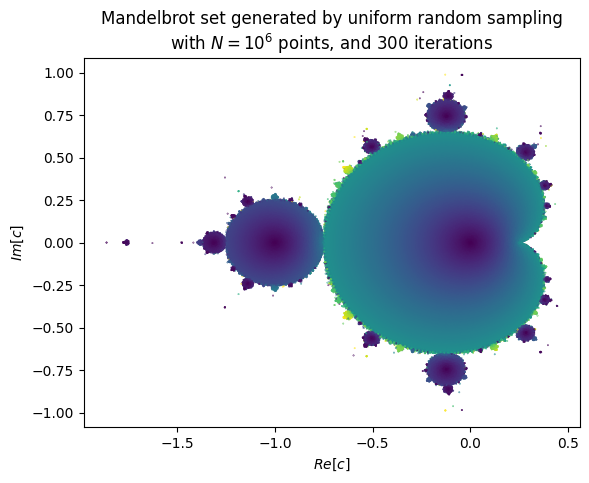

In [3]:
num_points = int(1E6)
iterations = 300
plot_mandelbrot(num_points=num_points, iterations=iterations)

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Uniform samples with cutout')

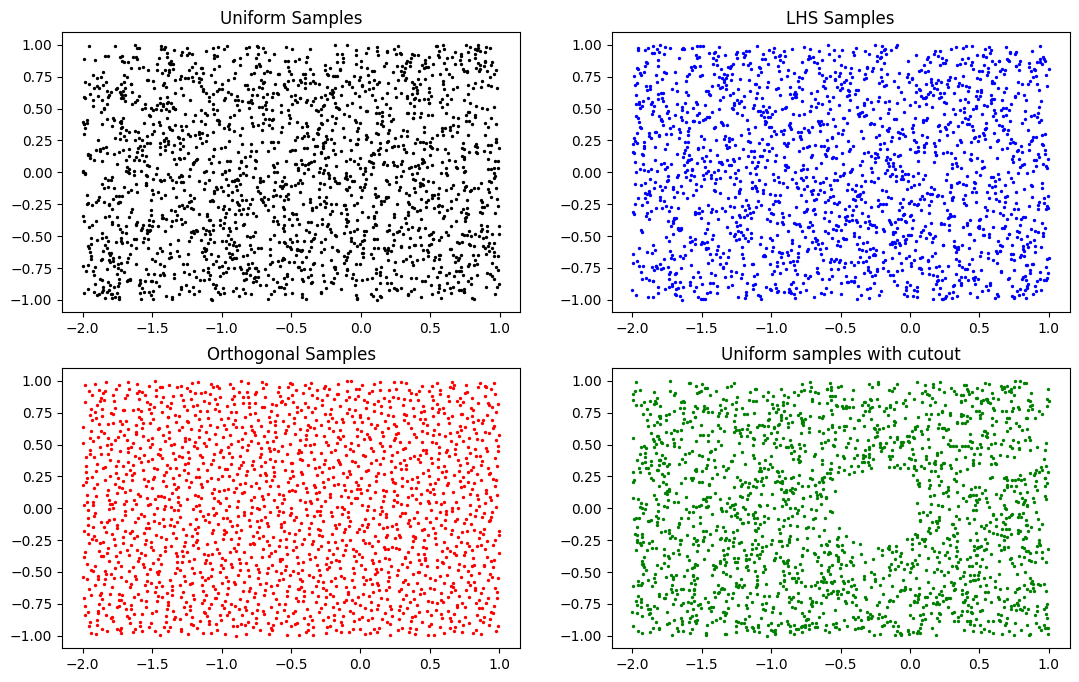

In [86]:
num_points = 2000

uniform_sample = complex_random_array(num_points)
lhs_sample = complex_random_array(num_points, method='lhs')
ortho_sample = complex_random_array(num_points, method='ortho')
cutout_sample, _ = complex_random_array(num_points, method='cutout')
print(type(ortho_sample))

fig, axs = plt.subplots(2, 2)
fig.set_figwidth(13)
fig.set_figheight(8)
axs[0,0].scatter(uniform_sample.real, uniform_sample.imag, label="Uniform Samples", c='k', s=2)
axs[0,1].scatter(lhs_sample.real, lhs_sample.imag, label="LHS Samples", c='b', s=2)
axs[1,0].scatter(ortho_sample.real, ortho_sample.imag, label="Orthogonal Samples", c='r', s=2)
axs[1,1].scatter(cutout_sample.real, cutout_sample.imag, label="Uniform samples with cutout", c='g', s=2)

axs[0, 0].set_title("Uniform Samples")
axs[0, 1].set_title("LHS Samples")
axs[1, 0].set_title("Orthogonal Samples")
axs[1, 1].set_title("Uniform samples with cutout")

In [27]:

start_time = time.time()
best_area_value, best_area_std, best_area_conf = estimate_area(int(1E6), 10, 200, 10)
end_time = time.time()
execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")
print(best_area_value, best_area_std, best_area_conf)

Execution Time: 0.9992210865020752 seconds
1.5341999999999998 0.068780520498176 [1.4823358842993324, 1.5860641157006672]


In [28]:

start_time = time.time()
best_area_value_lhs, best_area_std_lhs, best_area_conf_lhs = estimate_area(int(1E6), 10, 200, 10, method='lhs')
end_time = time.time()
execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")
print(best_area_value_lhs, best_area_std_lhs, best_area_conf_lhs)

KeyboardInterrupt: 

In [25]:
start_time = time.time()
best_area_value_ortho, best_area_std_ortho, best_area_conf_ortho = estimate_area(int(1E6), 10, 200, 10, method='ortho')
end_time = time.time()
execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")
print(best_area_value_ortho, best_area_std_ortho, best_area_conf_ortho)

Execution Time: 1.013211965560913 seconds
1.5290322580645161 0.02116351873882829 [1.5130738562299015, 1.5449906598991308]


In [26]:
start_time = time.time()
best_area_value_cutout, best_area_std_cutout, best_area_conf_cutout = estimate_area(int(1E6), 10, 200, 10, method='cutout')
end_time = time.time()
execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")
print(best_area_value_cutout, best_area_std_cutout, best_area_conf_cutout)

Execution Time: 1.1230957508087158 seconds
1.5093736354218763 0.07327712749058296 [1.454118842482574, 1.5646284283611787]


In [8]:
num_points = int(1E3)
# may not work properly when iterations / intermediate_steps != 10
iterations = 200
intermediate_steps = 20 
repetitions = 20
average_areas_uniform, average_lengths_uniform = intermediate_iterations(sample_size=num_points, iterations=iterations, 
                                                              intermediate_steps=intermediate_steps, repetitions=repetitions)

average_areas_lhs, average_lengths_lhs = intermediate_iterations(sample_size=num_points, iterations=iterations, 
                                                              intermediate_steps=intermediate_steps, repetitions=repetitions, method='lhs')

average_areas_ortho, average_lengths_ortho = intermediate_iterations(sample_size=num_points, iterations=iterations, 
                                                              intermediate_steps=intermediate_steps, repetitions=repetitions, method='ortho')

average_areas_cutout, average_lengths_cutout = intermediate_iterations(sample_size=num_points, iterations=iterations, 
                                                              intermediate_steps=intermediate_steps, repetitions=repetitions, method='cutout')


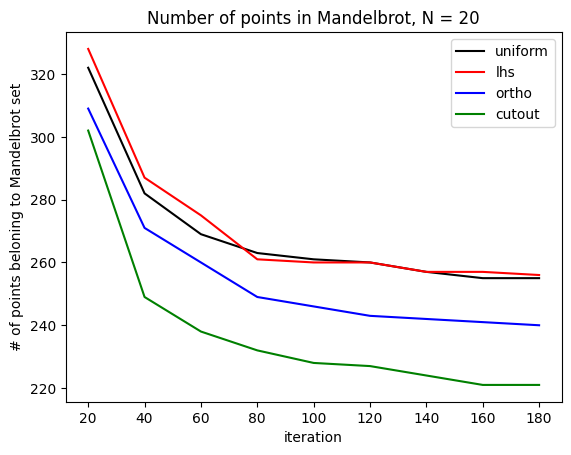

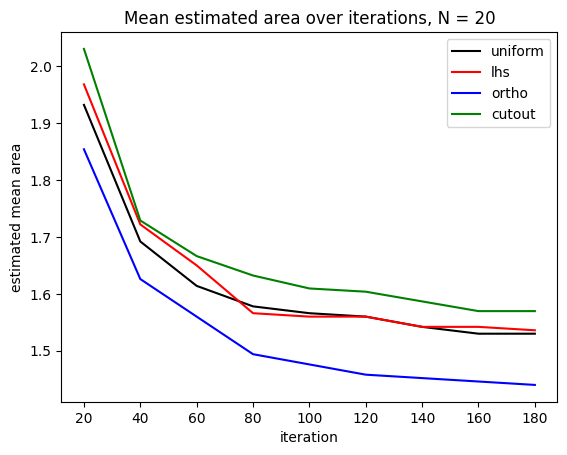

In [10]:
methods = ['uniform', 'lhs', 'ortho', 'cutout']
colors = ['k', 'r', 'b', 'g']

x = [i * intermediate_steps for i in range(iterations // intermediate_steps)]
plt.plot(x[1:], average_lengths_uniform[1:], colors[0], label=methods[0])
plt.plot(x[1:], average_lengths_lhs[1:], colors[1], label=methods[1])
plt.plot(x[1:], average_lengths_ortho[1:], colors[2], label=methods[2])
plt.plot(x[1:], average_lengths_cutout[1:], colors[3], label=methods[3])
plt.title(f'Number of points in Mandelbrot, N = {repetitions}')
plt.xlabel('iteration')
plt.ylabel('# of points beloning to Mandelbrot set')
plt.legend()

plt.figure()
plt.plot(x[1:], average_areas_uniform[1:], 'k', label=methods[0])
plt.plot(x[1:], average_areas_lhs[1:], 'r', label=methods[1])
plt.plot(x[1:], average_areas_ortho[1:], 'b', label=methods[2])
plt.plot(x[1:], average_areas_cutout[1:], 'g', label=methods[3])
plt.title(f'Mean estimated area over iterations, N = {repetitions}')
plt.xlabel('iteration')
plt.ylabel('estimated mean area')
plt.legend()

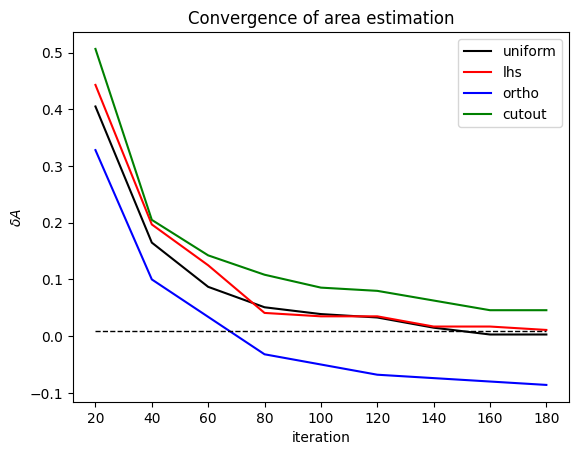

In [11]:
best_area_value_uniform = 1.527021
best_area_value_lhs = 1.5249972
best_area_value_ortho = 1.525929
best_area_value_cutout = 1.5238682060290496

errors_uniform = calculate_error_over_iterations(best_area_value_uniform, average_areas_uniform)
errors_lhs = calculate_error_over_iterations(best_area_value_lhs, average_areas_lhs)
errors_ortho = calculate_error_over_iterations(best_area_value_ortho, average_areas_ortho)
errors_cutout= calculate_error_over_iterations(best_area_value_cutout, average_areas_cutout)

methods = ['uniform', 'lhs', 'ortho', 'cutout']
colors = ['k', 'r', 'b', 'g']

x = [i * intermediate_steps for i in range(iterations // intermediate_steps)]
plt.plot(x[1:], errors_uniform[1:], colors[0], label=methods[0])
plt.plot(x[1:], errors_lhs[1:], colors[1], label=methods[1])
plt.plot(x[1:], errors_ortho[1:], colors[2], label=methods[2])
plt.plot(x[1:], errors_cutout[1:], colors[3], label=methods[3])
plt.plot(x[1:], [0.01 for i in range(len(errors_cutout) - 1)], 'k--', linewidth=1)
plt.title('Convergence of area estimation')
plt.xlabel('iteration')
plt.ylabel('$\delta A$')
plt.legend()

In [12]:
sample_sizes = np.linspace(int(1E2), int(1E4), num=10).astype(int)

methods=['uniform', 'lhs', 'ortho', 'cutout']
areas, stds = plot_area_vs_sample_size(sample_sizes=sample_sizes, repetitions=10, iterations=100, iteration_step=10, methods=methods)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Leo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3548, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Leo\AppData\Local\Temp\ipykernel_17220\946363870.py", line 4, in <module>
    areas, stds = plot_area_vs_sample_size(sample_sizes=sample_sizes, repetitions=10, iterations=100, iteration_step=10, methods=methods)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Leo\Documents\GitHub\Stochastic-Simulation\mandelbrot.py", line 287, in plot_area_vs_sample_size
    temp_area, temp_std = area_vs_sample_size(sample_sizes, repetitions, iterations, iteration_step, method)
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c

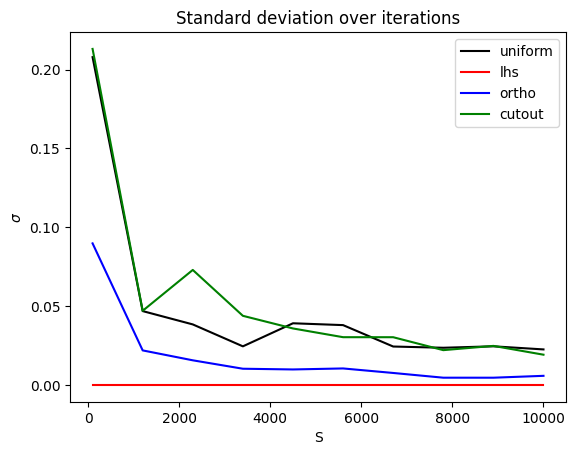

In [75]:
colors = ['k', 'r', 'b', 'g']
methods=['uniform', 'lhs', 'ortho', 'cutout']
for i, std in enumerate(stds):
    plt.plot(sample_sizes, std, colors[i], label=methods[i])
plt.title('Standard deviation over iterations')
plt.xlabel('S')
plt.ylabel('$\sigma$')
plt.legend()

In [76]:
""" Tests for normality of resulting mean areas """

from scipy.stats import shapiro

for i, data in enumerate(areas):

    statistic, p_value = shapiro(data)

    # Output the results
    print(f"Shapiro-Wilk for {methods[i]}: p_value = {p_value:.4f}")


Shapiro-Wilk for uniform: p_value = 0.0008
Shapiro-Wilk for lhs: p_value = 0.9954
Shapiro-Wilk for ortho: p_value = 0.1963
Shapiro-Wilk for cutout: p_value = 0.1441


In [77]:
from scipy.stats import ttest_ind
output = []
for i, method1 in enumerate(methods):
    for j, method2 in enumerate(methods):
        if method1 != method2:
            t_statistic, p_value = ttest_ind(areas[i], areas[j])
            result = f'{method1} vs {method2} p_value = {p_value}'
            result_reverse = f'{method2} vs {method1} p_value = {p_value}'
            if (result not in output) and (result_reverse not in output):
                output.append(result)
                print(result)

uniform vs lhs p_value = 0.38287500035173005
uniform vs ortho p_value = 0.4864477191410893
uniform vs cutout p_value = 0.882788826424503
lhs vs ortho p_value = 0.5995067583592586
lhs vs cutout p_value = 0.3382061322212555
ortho vs cutout p_value = 0.32992542683630866


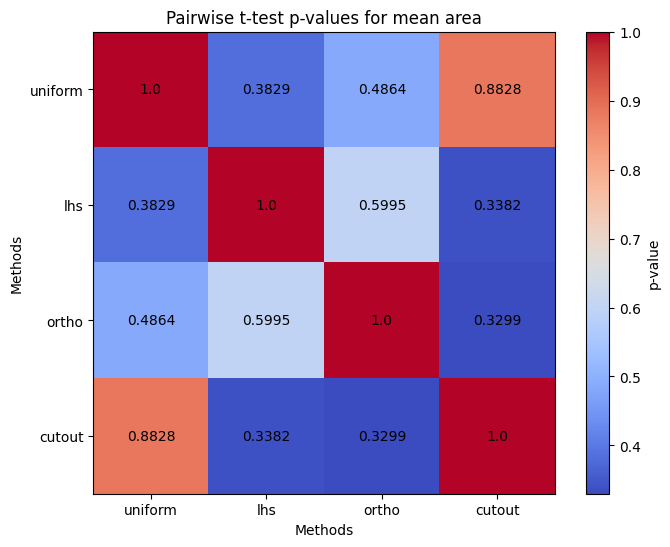

In [84]:
plot_pairwise_ttest(areas, methods, input_type='mean areas')

In [25]:
""" Normality test for stds """

from scipy.stats import shapiro

for i, data in enumerate(stds):

    statistic, p_value = shapiro(data)

    # Output the results
    print(f"Shapiro-Wilk for {methods[i]}: p_value = {p_value:.4f}")


Shapiro-Wilk for uniform: p_value = 0.0000
Shapiro-Wilk for lhs: p_value = 0.0000
Shapiro-Wilk for ortho: p_value = 0.0000
Shapiro-Wilk for cutout: p_value = 0.0000


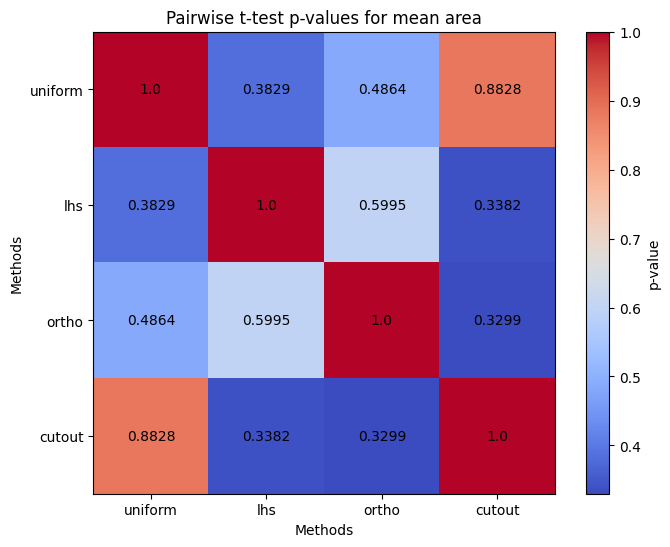

In [85]:
plot_pairwise_ttest(stds, methods, input_type='$\sigma$')

c:\Users\Leo\Documents\GitHub\Stochastic-Simulation\mandelbrot.py:11: RuntimeWarning: overflow encountered in scalar multiply
  z.append(z[k] * z[k] + c)
c:\Users\Leo\Documents\GitHub\Stochastic-Simulation\mandelbrot.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  z.append(z[k] * z[k] + c)
c:\Users\Leo\Documents\GitHub\Stochastic-Simulation\mandelbrot.py:24: RuntimeWarning: overflow encountered in scalar multiply
  return np.sqrt((z.real)*(z.real) + (z.imag)*(z.imag))
c:\Users\Leo\Documents\GitHub\Stochastic-Simulation\mandelbrot.py:24: RuntimeWarning: overflow encountered in scalar add
  return np.sqrt((z.real)*(z.real) + (z.imag)*(z.imag))


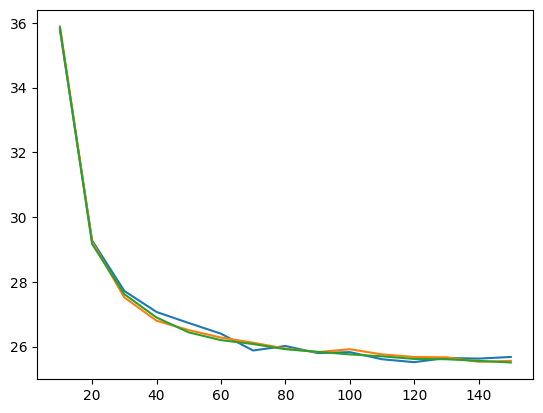

In [4]:
num_points = int(1E5)
iterations_array = [(i+1)*10 for i in range(15)]

mand_sizes_uniform = []
mand_sizes_lhs = []
mand_sizes_ortho = []
for i in iterations_array:
    c_array_uniform = complex_random_array(num_points)
    c_array_lhs = complex_random_array(num_points, method='lhs')
    c_array_ortho = complex_random_array(num_points, method='ortho')

    mand_set_uniform = generate_mandelbrot(0, c_array_uniform, i, 10, 2)
    mand_set_lhs = generate_mandelbrot(0, c_array_lhs, i, 10, 2)
    mand_set_ortho = generate_mandelbrot(0, c_array_ortho, i, 10, 2)

    mand_sizes_uniform.append(len(mand_set_uniform))
    mand_sizes_lhs.append(len(mand_set_lhs))
    mand_sizes_ortho.append(len(mand_set_ortho))

plt.plot(iterations_array, np.round(np.divide(mand_sizes_uniform, num_points) * 100, 2))
plt.plot(iterations_array, np.round(np.divide(mand_sizes_lhs, num_points) * 100, 2))
plt.plot(iterations_array, np.round(np.divide(mand_sizes_ortho, num_points) * 100, 2))